In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:/DS-Intern-Assignment-main/data/data.csv')

# Display shape, data types, and missing values
print("Shape of the dataset:", data.shape)
print("Data types:\n", data.dtypes)


Shape of the dataset: (16857, 29)
Data types:
 timestamp                        object
equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                f

In [3]:
# Convert timestamp column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Check for any parsing issues
print("Null timestamps after conversion:", data['timestamp'].isnull().sum())

Null timestamps after conversion: 0


In [4]:
# List of columns to convert to float
columns_to_convert = [
    'equipment_energy_consumption',
    'lighting_energy',
    'zone1_temperature',
    'zone1_humidity',
    'zone2_temperature'
]

# Convert the columns to numeric, coercing any errors (invalid parsing) to NaN
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [7]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 timestamp                         0
equipment_energy_consumption      0
lighting_energy                 787
zone1_temperature               874
zone1_humidity                  827
zone2_temperature               858
zone2_humidity                  803
zone3_temperature               745
zone3_humidity                  808
zone4_temperature               758
zone4_humidity                  720
zone5_temperature               771
zone5_humidity                  734
zone6_temperature               787
zone6_humidity                  781
zone7_temperature               721
zone7_humidity                  755
zone8_temperature               786
zone8_humidity                  727
zone9_temperature               711
zone9_humidity                  817
outdoor_temperature             750
atmospheric_pressure            782
outdoor_humidity                738
wind_speed                      764
visibility_index                748
dew_point                       750
random_vari

In [6]:
# # Drop rows where equipment_energy_consumption is missing
# data = data.dropna(subset=['equipment_energy_consumption'])

# Remove rows with values < 5
data = data[data['equipment_energy_consumption'] >= 5]

In [8]:
# Basic statistical summary
print("Statistical Summary:\n", data.describe())

Statistical Summary:
                            timestamp  equipment_energy_consumption  \
count                          15631                  15631.000000   
mean   2016-03-10 03:21:26.635531776                    108.584711   
min              2016-01-11 17:00:00                     10.000000   
25%              2016-02-10 01:35:00                     50.000000   
50%              2016-03-10 01:50:00                     60.000000   
75%              2016-04-08 02:55:00                    100.000000   
max              2016-12-01 15:50:00                   1139.985693   
std                              NaN                    148.628836   

       lighting_energy  zone1_temperature  zone1_humidity  zone2_temperature  \
count     14844.000000       14757.000000    14804.000000       14773.000000   
mean          3.899077          21.250548       39.069446          19.804462   
min         -86.002966           8.726818      -46.660000           2.988199   
25%           0.000000     

In [9]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


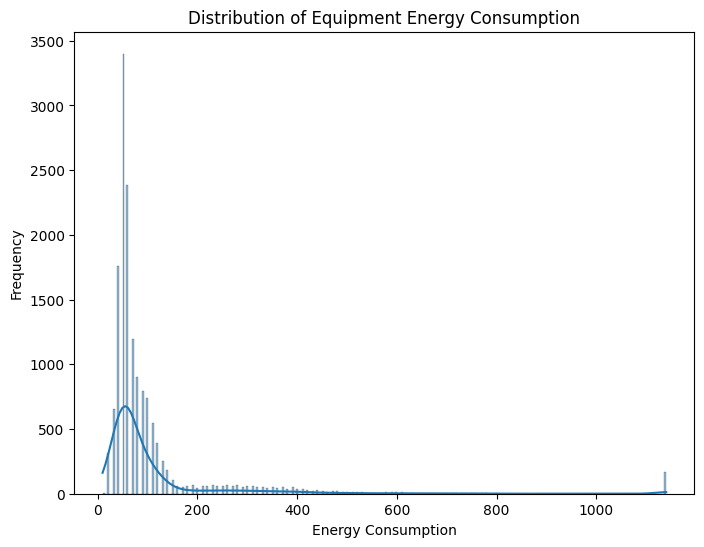

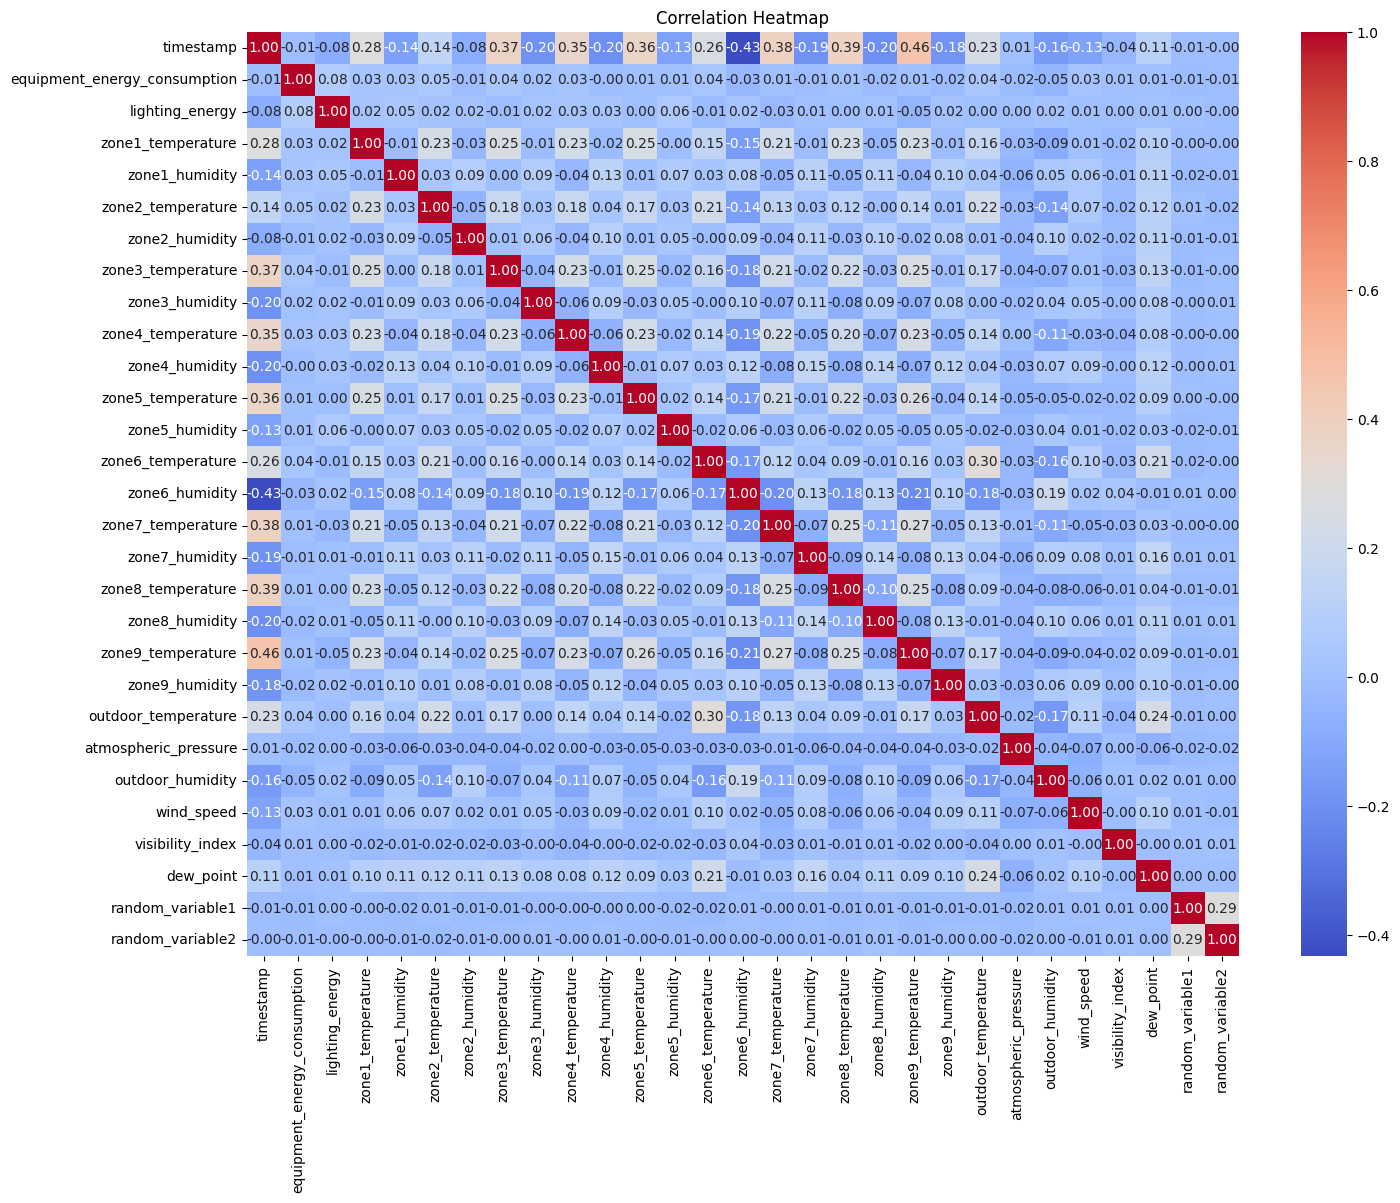

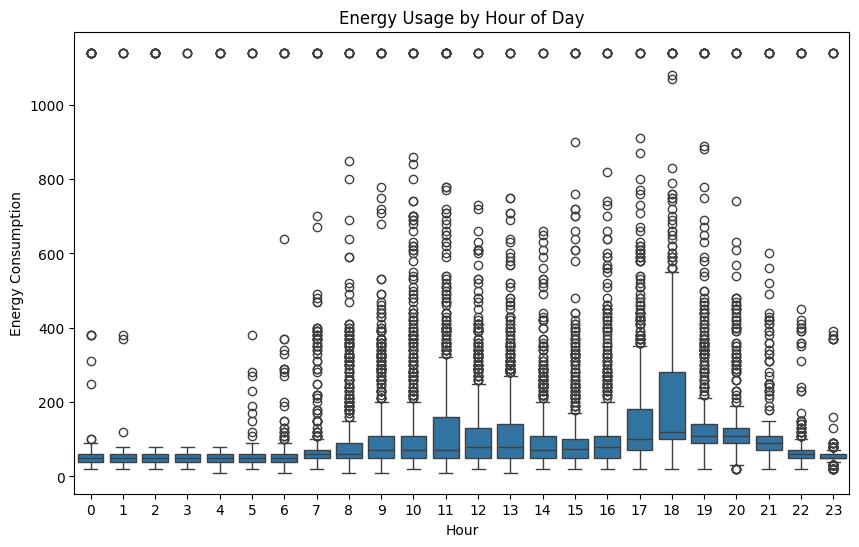

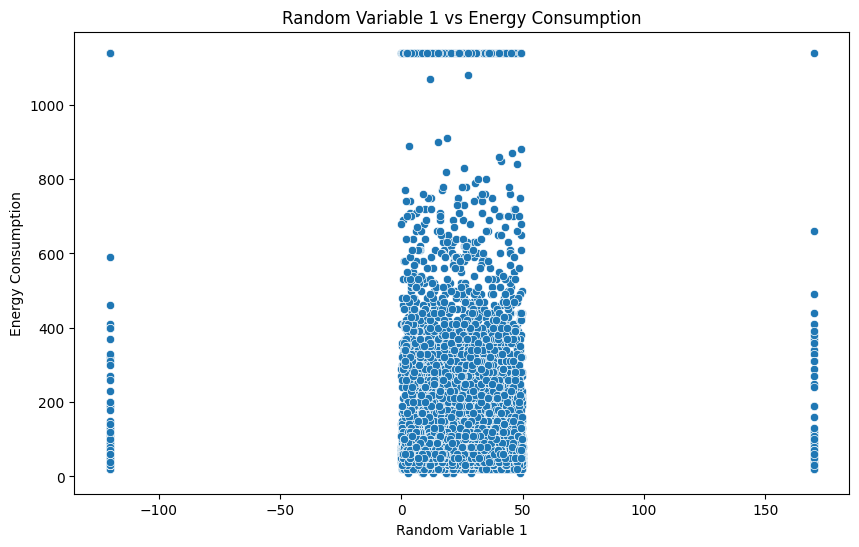

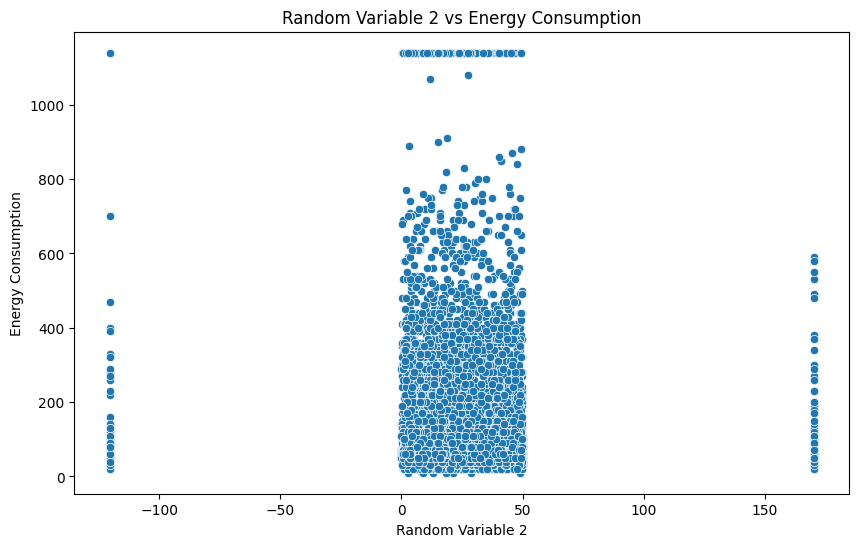

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize target variable distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['equipment_energy_consumption'], kde=True)
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Time-series trends (e.g., energy usage by hour/day)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.dayofweek

# Energy usage by hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='equipment_energy_consumption', data=data)
plt.title('Energy Usage by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption')
plt.show()

# Compare random_variable1/2 with the target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='random_variable1', y='equipment_energy_consumption', data=data)
plt.title('Random Variable 1 vs Energy Consumption')
plt.xlabel('Random Variable 1')
plt.ylabel('Energy Consumption')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='random_variable2', y='equipment_energy_consumption', data=data)
plt.title('Random Variable 2 vs Energy Consumption')
plt.xlabel('Random Variable 2')
plt.ylabel('Energy Consumption')
plt.show()
